In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 1-й спобос через os
import os

In [3]:
path = '/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data'

In [4]:
os.listdir('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov')

['data.csv']

In [5]:
# текущая директория
os.getcwd()

'/home/jupyter-i.babuhivskaya-1/lesson_4'

In [6]:
path + '/2020-12-05'

'/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05'

In [7]:
path_parts = '/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov'.split('/')
date = path_parts[-2]
name = path_parts[-1]
print(date, name)

2020-12-05 Rostislav_Smirnov


In [8]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        
        # Construct full path to file
        data_path = f'{current_path}/{file}'
        
        # Read data
        temp_df = pd.read_csv(data_path)
        
        # Extract date and name
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data into main df
        df = pd.concat((df, temp_df))

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.quantity.sum()

480

In [12]:
pd.concat((temp_df, temp_df), axis = 0)

,Unnamed: 0,product_id,quantity,date,name
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov
2,2,64,1,2020-12-07,Vasiliy_Ivanov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov
2,2,64,1,2020-12-07,Vasiliy_Ivanov


In [3]:
pathway = '/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data'

In [4]:
# 2-й способ pathlib
from pathlib import Path
type(pathway)

str

In [5]:
Path('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data')

PosixPath('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data')

In [6]:
path = Path('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data')

In [13]:
print(path)

/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data


In [7]:
# список методов доступных для функции dir
dir(path)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_reserved',
 '

In [24]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df. path - строка пути или объект пути(Path)
for current_path, dirs, files in os.walk(path):
#    print(type(current_path), dirs, files)
#    break
    for file in files:
        part_path = Path(current_path)   #os.path.join
        data_path = part_path / file             # part_path / direct / file 
        # Construct full path to file
        # data_path = f'{current_path}/{file}'
        
        # Read data
        temp_df = pd.read_csv(data_path)
        #print(temp_df.shape)
        
        # Extract date and name
        #path_parts = current_path.split('/')
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        # Add name and date columns
        temp_df['name'] = name
        temp_df['date'] = date
        
        # Insert data into main df
        df = pd.concat((df, temp_df))

In [23]:
data_path

PosixPath('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data/2020-12-07/Vasiliy_Ivanov/data.csv')

In [21]:
data_path.name

'data.csv'

In [22]:
data_path.parts

('/',
 'home',
 'jupyter-i.babuhivskaya-1',
 'shared',
 'homeworks',
 'python_ds_miniprojects',
 '4',
 'data',
 '2020-12-07',
 'Vasiliy_Ivanov',
 'data.csv')

In [25]:
df

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [28]:
#3-й способ
path = '/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data'

In [30]:
miniproject_path = Path(path)
miniproject_path

PosixPath('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data')

In [33]:
df = pd.DataFrame()

for csv_path in miniproject_path.glob('**/*.csv'): # ** - все пути
    temp_df = pd.read_csv(csv_path)
    df = pd.concat((df, temp_df))
    # с помощью .parts достать части даты и имя
df    

,Unnamed: 0,product_id,quantity
0,0,27,4
1,1,89,1
2,2,33,2
3,3,8,3
4,4,16,1
...,...,...,...
0,0,18,4
1,1,94,4
0,0,95,2
1,1,83,3


In [ ]:
#for path, dirs, files in os.walk('/home/jupyter-i.babuhivskaya-1/shared/homeworks/python_ds_miniprojects/4/data'):
#    full_path = f"{path}/{files[0]}"

In [13]:
list_df = []
for date in os.listdir(path):
    path2 = path + '/' + date
    for name in os.listdir(path2):
        path3 = path2 + '/' + name
        source = path3 + '/' + 'data.csv'
        buf_df = pd.read_csv(source, index_col=0)
        buf_df['date'] = date
        buf_df['name'] = name
        list_df.append(buf_df)
df = pd.concat(list_df)
df.quantity.sum()

480

In [14]:
# какой пользователь купил больше всего товаров
df.groupby('name', as_index = False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending = False).head(3)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45


In [15]:
df.dtypes

product_id     int64
quantity       int64
date          object
name          object
dtype: object

In [16]:
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот 
products = df.groupby('product_id') \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending = False).head(10).reset_index()

In [17]:
products

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


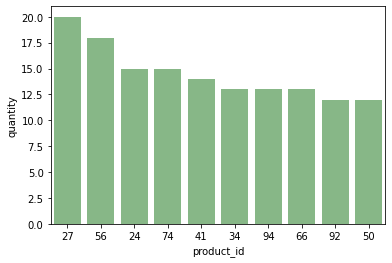

In [18]:
sns.barplot(x = products.product_id, 
            y = products.quantity, 
            color = 'green', 
            alpha = 0.5, order = products.product_id)

In [19]:
# Посмотрим на продажи по дням! Для визуализации снова используйте барплот
days = df.groupby('date') \
    .agg({'quantity': 'sum'}) \
    .sort_values('date').head(10).reset_index()

In [20]:
days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


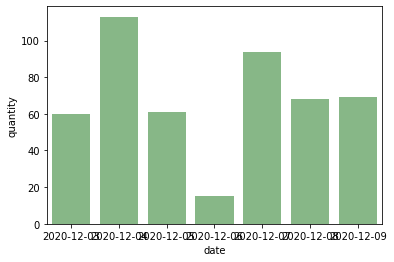

In [21]:
sns.barplot(x = days.date, 
            y = days.quantity, 
            color = 'green', 
            alpha = 0.5)

In [36]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
df.head(5)

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [37]:
df.product_id.nunique()

71

In [38]:
df = df.drop_duplicates()

In [45]:
df.groupby(['product_id', 'date'], as_index=False)\
        .agg({'name': 'count'}) \
        .sort_values('product_id')

,product_id,date,name
0,0,2020-12-03,1
1,1,2020-12-03,1
2,3,2020-12-04,2
3,4,2020-12-03,1
4,4,2020-12-09,1
...,...,...,...
139,95,2020-12-09,1
140,96,2020-12-04,1
141,97,2020-12-06,1
142,99,2020-12-04,1


In [48]:
df.groupby(['product_id'], as_index=False)\
        .agg({'date': 'count', 'name': 'count'}) 

,product_id,date,name
0,0,1,1
1,1,1,1
2,3,2,2
3,4,2,2
4,6,3,3
...,...,...,...
66,94,4,4
67,95,2,2
68,96,1,1
69,97,1,1


In [52]:
df[df.product_id == 94]

,product_id,quantity,date,name
0,94,1,2020-12-04,Vasiliy_Ivanov
5,94,4,2020-12-03,Alexey_Smirnov
0,94,4,2020-12-03,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov


In [43]:
df[df.product_id == 4]

,product_id,quantity,date,name
3,4,4,2020-12-09,Alexey_Smirnov
1,4,2,2020-12-03,Vasiliy_Ivanov


In [55]:
df[['name', 'date', 'product_id']].head(10)

,name,date,product_id
0,Petr_Ivanov,2020-12-05,27
1,Petr_Ivanov,2020-12-05,89
2,Petr_Ivanov,2020-12-05,33
3,Petr_Ivanov,2020-12-05,8
4,Petr_Ivanov,2020-12-05,16
0,Petr_Smirnov,2020-12-05,55
1,Petr_Smirnov,2020-12-05,49
2,Petr_Smirnov,2020-12-05,22
3,Petr_Smirnov,2020-12-05,83
0,Rostislav_Smirnov,2020-12-05,66


In [54]:
df.groupby(['name', 'date'], as_index=False) \
        .agg({'product_id': 'nunique'})

,name,date,product_id
0,Alexey_Fedorov,2020-12-05,2
1,Alexey_Fedorov,2020-12-07,4
2,Alexey_Fedorov,2020-12-08,5
3,Alexey_Ivanov,2020-12-07,6
4,Alexey_Petrov,2020-12-05,3
5,Alexey_Smirnov,2020-12-03,6
6,Alexey_Smirnov,2020-12-04,5
7,Alexey_Smirnov,2020-12-07,2
8,Alexey_Smirnov,2020-12-09,4
9,Anton_Ivanov,2020-12-07,1


In [25]:
users = df.groupby(['name','product_id'], as_index=False) \
    .agg({'date': 'nunique'}) \
    .sort_values('date', ascending = False)

In [26]:
users

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
109,Petr_Smirnov,21,1
103,Petr_Petrov,64,1
...,...,...,...
54,Anton_Smirnov,28,1
55,Anton_Smirnov,33,1
56,Anton_Smirnov,34,1
57,Anton_Smirnov,40,1
